<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/Copy_of_LS_DS_Unit_4_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the difference between a discriminator and generator in a GAN
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import reuters
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

# restore np.load for future normal usage
np.load = np_load_old

In [0]:
# from tensorflow.keras.datasets import reuters

# (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None,
#                                                          skip_top=0,
#                                                          maxlen=None,
#                                                          test_split=0.2,
#                                                          seed=723812,
#                                                          start_char=1,
#                                                          oov_char=2,
#                                                          index_from=3)

In [40]:
print(' '.join([index_to_word[x] for x in x_train[0]]))
print(y_train[0])

the 100 k world i values there's mln by in best sweden a mths money as sales repurchase for decision official mln in official growers by there's plan unacceptable and for government said american business mln a faces and for opened 9 in best talks sweden by repurchase cts repurchase there's as uncertainty jobs paper 9 in offer she letter leveraged a mths money pct dlrs
19


In [41]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
# index_to_word = {}
# for key, value in word_index.items():
#     index_to_word[value] = key

In [0]:
from keras.preprocessing.text import Tokenizer

max_words = 10000
num_classes = max(y_train) + 1

tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [43]:
print(x_train[0])
print(len(x_train[0]))

print(y_train[0])
print(len(y_train[0]))

[0. 1. 0. ... 0. 0. 0.]
10000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
46


In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.metrics_names)
['loss', 'acc']
batch_size = 32
epochs = 3

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

['loss', 'acc']
Train on 8083 samples, validate on 899 samples
Epoch 1/3
8083/8083 [==============================] - 4s 494us/step - loss: 1.3038 - acc: 0.7163 - val_loss: 0.9706 - val_acc: 0.7864
Epoch 2/3
8083/8083 [==============================] - 3s 380us/step - loss: 0.5106 - acc: 0.8837 - val_loss: 0.8564 - val_acc: 0.8020
Epoch 3/3
2246/2246 [==============================] - 0s 122us/step
Test loss: 0.8295787915733385
Test accuracy: 0.8210151380762285


Conclusion - RNN runs, and gives pretty decent improvement over a naive model. To *really* improve the model, more playing with parameters would help. Also - RNN may well not be the best approach here, but it is at least a valid one.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [45]:
!pip install google_images_download

     |████████████████████████████████| 911kB 9.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [61]:
#i'm changing the limit to 0 as first five doesn't include any frogs for me
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 10, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 4.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://www.pixoto.com/images-photography/animals/birds/birds-in-a-pond-5986310798966784.jpg
Completed Image ====> 5.birds-in-a-pond-5986310798966784.jpg
Image URL: https://pixnio.com/free-images/fauna-animals/reptiles-and-amphibians/alligators-and-crocodiles-pictures/alliga

In [62]:
absolute_image_paths[0]['animal pond']

['/content/downloads/animal pond/1.Pondanimals.GIF',
 '/content/downloads/animal pond/2.hqdefault.jpg',
 '/content/downloads/animal pond/3.PKLS4116_inline.png',
 '/content/downloads/animal pond/4.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg',
 '/content/downloads/animal pond/5.birds-in-a-pond-5986310798966784.jpg',
 '/content/downloads/animal pond/6.alligator-animal-on-pond.jpg',
 '/content/downloads/animal pond/7.PKLS4116.png',
 '/content/downloads/animal pond/8.575c5b5c441e27ff04eb50571ee30127.jpg',
 '/content/downloads/animal pond/9.frog-3312038__340.jpg',
 '/content/downloads/animal pond/10.frog-2243543_960_720.jpg']

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [0]:
# TODO - your code!
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
frog_list = ['bullfrog', 'tree frog', 'tailed frog']

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if entry[1] in frog_list:
      return entry[2]
  return 0.0

In [64]:
import requests
image_list = absolute_image_paths[0]['animal pond']

for im in image_list:
  img_contains_frog(process_img_path(im))

[('n03598930', 'jigsaw_puzzle', 0.8680313), ('n06359193', 'web_site', 0.06410024), ('n02834397', 'bib', 0.021264324)]
[('n01443537', 'goldfish', 0.8495859), ('n01631663', 'eft', 0.06760218), ('n02536864', 'coho', 0.035163548)]
[('n04243546', 'slot', 0.8712449), ('n04476259', 'tray', 0.04993588), ('n03908618', 'pencil_box', 0.023072386)]
[('n02442845', 'mink', 0.3097652), ('n02363005', 'beaver', 0.23399033), ('n02361337', 'marmot', 0.20796789)]
[('n02009912', 'American_egret', 0.7822415), ('n02012849', 'crane', 0.14339209), ('n02009229', 'little_blue_heron', 0.021143455)]
[('n01698640', 'American_alligator', 0.96394104), ('n01697457', 'African_crocodile', 0.026759902), ('n01737021', 'water_snake', 0.005964664)]
[('n03485794', 'handkerchief', 0.8822726), ('n02834397', 'bib', 0.022680892), ('n03291819', 'envelope', 0.020095171)]
[('n02116738', 'African_hunting_dog', 0.6101571), ('n02105162', 'malinois', 0.19866791), ('n02114712', 'red_wolf', 0.051153056)]
[('n01737021', 'water_snake', 0.3

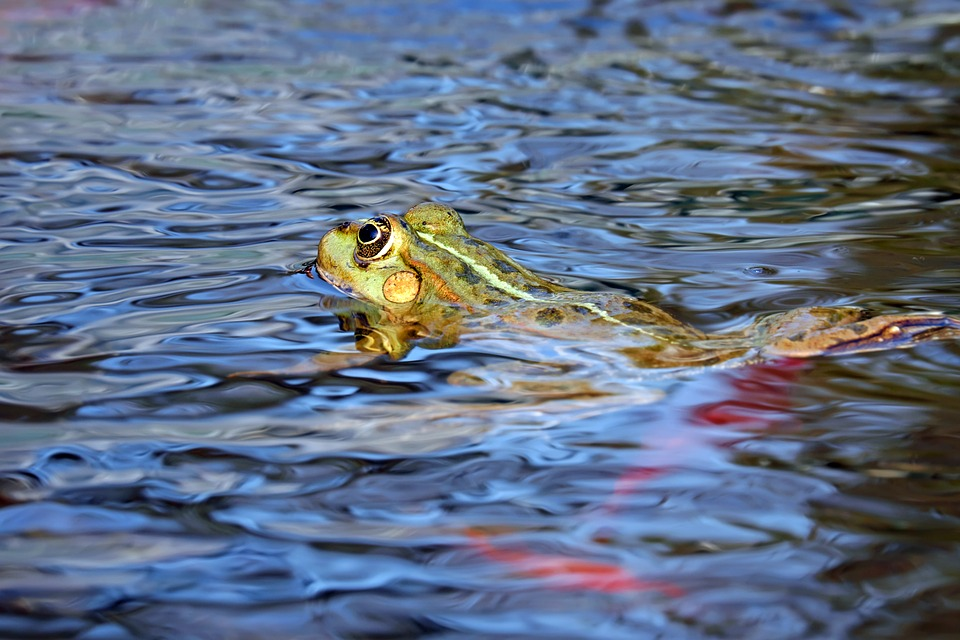

In [66]:
from IPython.display import Image
Image(filename=image_list[9], width=600)

<a id="p3"></a>
## Part 3 - Generative Adverserial Networks (GANS)

Describe the difference between a discriminator and generator in a GAN in your own words.

__*Your Answer:*__ 
A GAN is two algorithms set against each other.  One of them will try and generate some new data which is indistinguishable from the data it is trained on and the other algorithm will try and detect the real data from the fake data.  For example, a common use is in images.  One algorithm will try and create a realistic image of a human face, while the other will try and detect which images are real peopel and which are fake.  over this process alrge improvements are made in the two algorithms.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
general interest in the subject.  you can never finish learning everything, and the field is moving so quickly you always have to be pushing yourself to learn more, so it helps a great deal to be interested in it from the outset
- What area of Data Science would you most like to learn more about, and why?
GANs - i think that's where a lot of the research seems to be heading now, and the results are pretty amazing.  also it seems to me to be the closest way to the wy humans do things, on an intuative level
- Where do you think Data Science will be in 5 years?
thre will be huge changes coming out of the big companies as they devote so many resources to it, and it will be more common place in the day to day running of ordinary companies
- What are the threats posed by AI to our society?
the most pressing one is replacement by automation for large sections of teh work force, then beyond that if AGI was achieved wuld it even want to keep us around and what would we be for
- How do you think we can counteract those threats? 
I think Max Tegmark and his future of life set up is way ahead there.  i think they have put a great deal of thought into things and now have buy-in from very important people
- Do you think achieving General Artifical Intelligence is ever possible?
yes, just a matter of time

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")